In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
from google.colab import auth
import gspread
from google.auth import default
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [8]:
worksheet = gc.open('mydata').sheet1
rows = worksheet.get_all_values()

In [9]:
dataset1 = pd.DataFrame(rows[1:], columns=rows[0])
dataset1 = dataset1.astype({'input':'float'})
dataset1 = dataset1.astype({'output':'float'})

In [10]:
dataset1.head()

,input,output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [11]:
X=dataset1[{'input'}].values
Y=dataset1[{'output'}].values

<ipython-input-11-f77a005f96dd>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X=dataset1[{'input'}].values
<ipython-input-11-f77a005f96dd>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Y=dataset1[{'output'}].values


In [12]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)

In [14]:
model = Sequential([
  Dense(8,activation = 'relu'),
  Dense(10,activation ='relu'),
  Dense(1)
])

In [16]:
model.compile(optimizer='rmsprop',loss='mse')
model.fit(X_train1,Y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 778ms/step - loss: 11028.5381
Epoch 2/2000
1/1 [==============================] - 0s 9ms/step - loss: 11025.6768
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 11023.6182
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 11021.9111
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 11020.4160
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 11019.0625
Epoch 7/2000
1/1 [==============================] - 0s 11ms/step - loss: 11017.7930
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 11016.5830
Epoch 9/2000
1/1 [==============================] - 0s 14ms/step - loss: 11015.4316
Epoch 10/2000
1/1 [==============================] - 0s 10ms/step - loss: 11014.3301
Epoch 11/2000
1/1 [==============================] - 0s 8ms/step - loss: 11013.2793
Epoch 12/2000
1/1 [==============================] - 0s 8ms/step - loss: 11012

<Axes: >

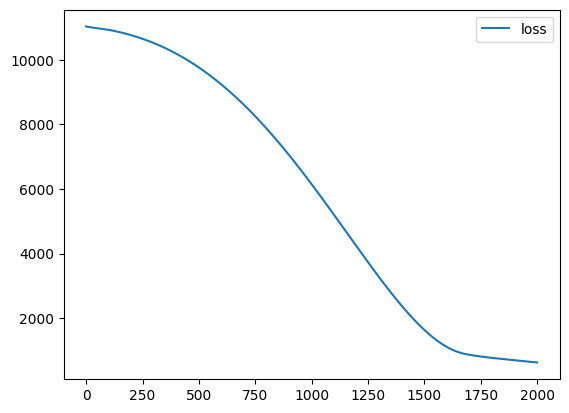

In [17]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [18]:
X_test1 = Scaler.transform(X_test)
model.evaluate(X_test1,Y_test)


1/1 [==============================] - 0s 130ms/step - loss: 1122.2816


1122.2816162109375

In [19]:
X_n1 = [[30]]
X_n1_1 = Scaler.transform(X_n1)
model.predict(X_n1_1)

1/1 [==============================] - 0s 86ms/step


array([[195.34259]], dtype=float32)